# Imports

In [1]:
from imports import *
import prepare as prep

%matplotlib inline


# Decision Tree

## 1 - Split


In [2]:
# train, validate, test = prep.tralidest(X_train,'target_column')

# X_train = train.drop(columns=['target_column'])
# y_train = train.target_column

# X_validate = validate.drop(columns=['target_column'])
# y_validate = validate.target_column

# X_test = test.drop(columns=['target_column'])
# y_test = test.target_column

## 2 - Hit

In [3]:
# clf = DecisionTreeClassifier(max_depth=3, random_state=123)

# classification algorithm: gini or entropy (information gain)  
# default is gini

## 3 - Fit

In [4]:
# clf = clf.fit(X_train, y_train)

## 4 - Pic

In [5]:
# plt.figure(figsize=(16, 9), dpi=300)
# plot_tree(clf, feature_names=X_train.columns, class_names=y_train.unique())
# plt.show()

In [6]:
# print(export_text(clf, feature_names=X_train.columns.tolist()))

## 5 - Predict

In [7]:
# y_pred = clf.predict(X_train)

## 6 - Proba

In [8]:
# y_pred_proba = clf.predict_proba(X_train)

# Exercises

## !!! Please Note !!!
---
#### variable "tree_trunk" contains the following list:


>tree_trunk = [clf, y_pred, y_pred_prob, tree, conf, classi_report]


In [9]:
titanic = prep.prep_titanic()

prepping titanic
Using cached csv


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   age           714 non-null    float64
 2   sibsp         891 non-null    int64  
 3   parch         891 non-null    int64  
 4   fare          891 non-null    float64
 5   sex_male      891 non-null    uint8  
 6   embarked_Q    891 non-null    uint8  
 7   embarked_S    891 non-null    uint8  
 8   class_Second  891 non-null    uint8  
 9   class_Third   891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [11]:
df=titanic
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   age           714 non-null    float64
 2   sibsp         891 non-null    int64  
 3   parch         891 non-null    int64  
 4   fare          891 non-null    float64
 5   sex_male      891 non-null    uint8  
 6   embarked_Q    891 non-null    uint8  
 7   embarked_S    891 non-null    uint8  
 8   class_Second  891 non-null    uint8  
 9   class_Third   891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [12]:
train, validate, test = prep.tralidest(df,'survived')

In [13]:
train.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,NaN,0,0,7.7500,1,1,0,0,1
1,1,62.0,0,0,80.0000,0,0,0,0,0
2,1,31.0,1,0,113.2750,0,0,0,0,0
3,1,35.0,0,0,512.3292,0,0,0,0,0
4,0,45.0,0,0,6.9750,1,0,1,0,1


In [14]:
train, validate, test=prep.impute_mode(train, validate, test, ['age'])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [15]:
target='survived'
titanic_ml_data=prep.ml_data(train, validate, test, target)

## 1

In [16]:
X_train=titanic_ml_data[0]
baseline=[0 for i in range(0,len(X_train))]
y_train=titanic_ml_data[1]

What is your baseline prediction?

- $H_0: "\textrm{Does NOT survive.}"$  
- $H_1: "\textrm{Survives.}"$
---

- $TP: "\textrm{Jack (..from Titanic (..the movie.))}"$  
- $TN: "\textrm{Survivor}"$
- $FN: "\textrm{Jack in the boat.}"$
- $FP: "\textrm{Survivor in the pond.}"$


In [17]:
X_train.head()

,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,19.0,0,0,7.7500,1,1,0,0,1
1,62.0,0,0,80.0000,0,0,0,0,0
2,31.0,1,0,113.2750,0,0,0,0,0
3,35.0,0,0,512.3292,0,0,0,0,0
4,45.0,0,0,6.9750,1,0,1,0,1


What is your baseline accuracy?

In [18]:
accuracy_score(y_train,baseline)

0.6161048689138576

## 2

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [19]:
titanic_clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [20]:
titanic_clf=titanic_clf.fit(X_train, y_train)

In [21]:
labels=[str(i) for i in y_train.unique()]

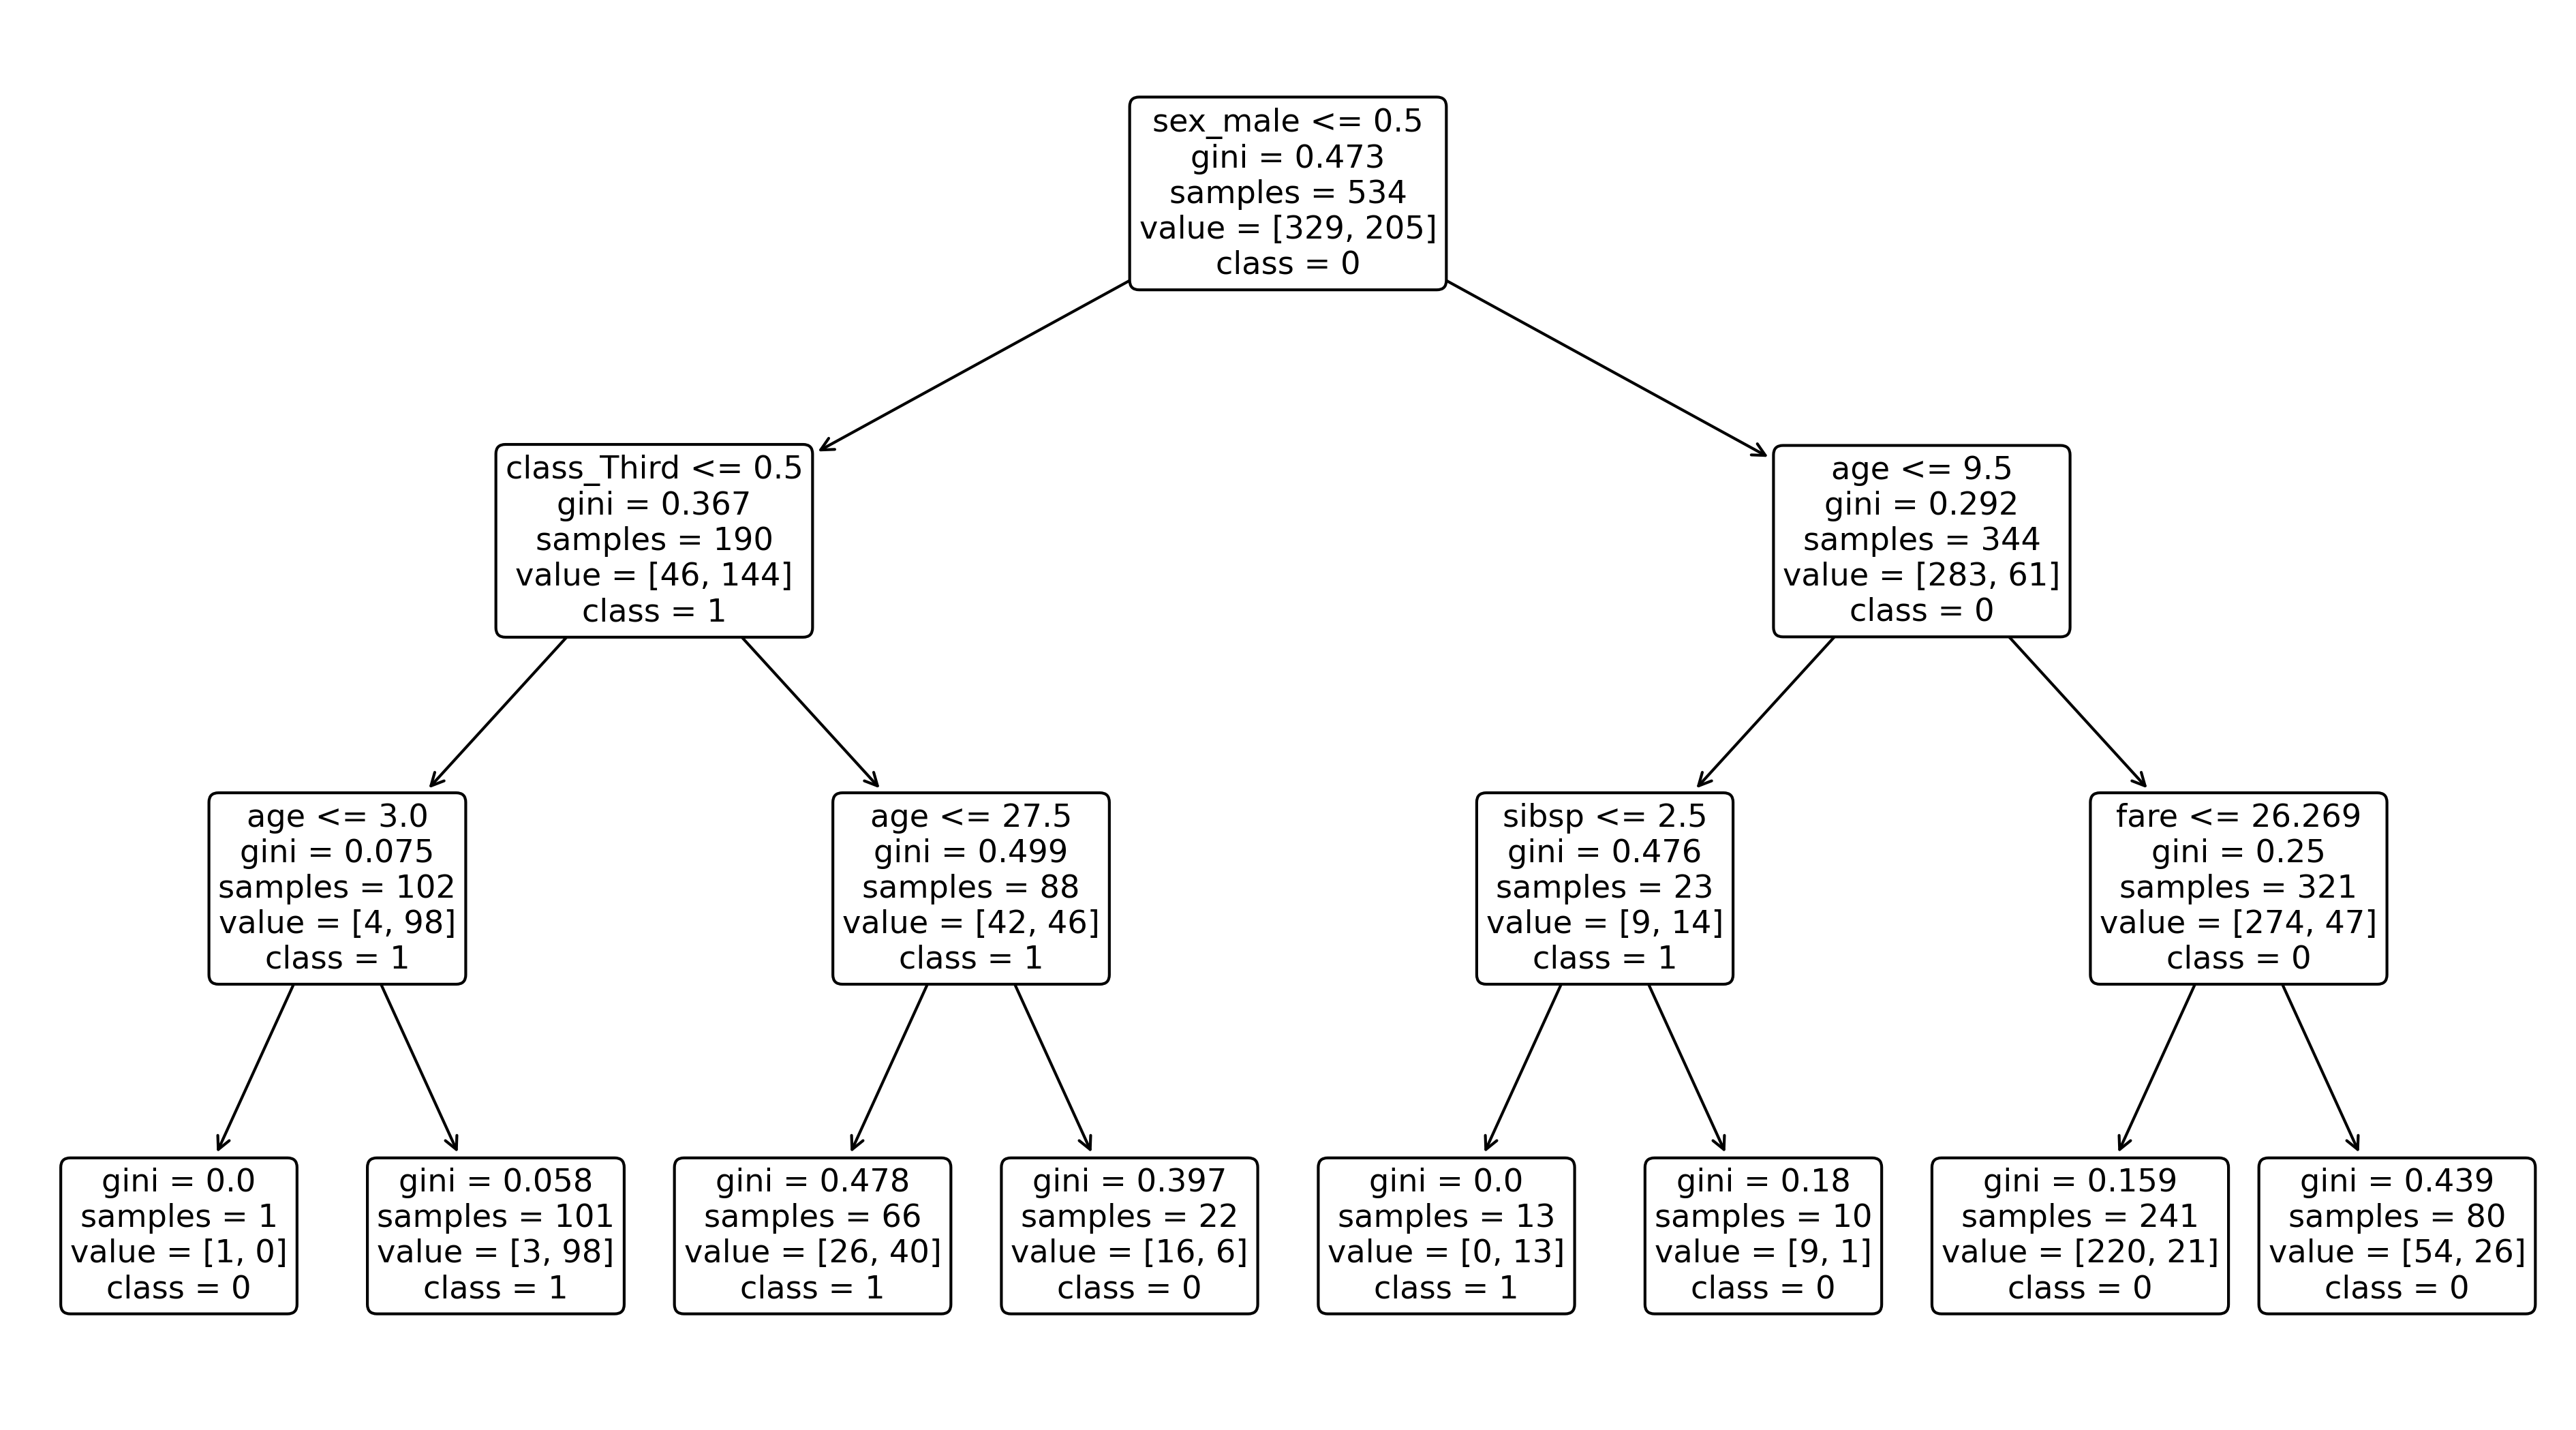

In [22]:
plt.figure(figsize=(16, 9), dpi=300)
tree=plot_tree(titanic_clf, feature_names=X_train.columns, class_names=labels, rounded=True)
plt.show()

In [23]:
y_pred =titanic_clf.predict(X_train)
y_pred[:5]

array([0, 1, 1, 1, 0])

In [24]:
y_pred_prob=titanic_clf.predict_proba(X_train)
y_pred_prob

array([[0.91286307, 0.08713693],
       [0.02970297, 0.97029703],
       [0.02970297, 0.97029703],
       ...,
       [0.675     , 0.325     ],
       [0.675     , 0.325     ],
       [0.91286307, 0.08713693]])

## 3

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [25]:
titanic_clf.score(X_train,y_train)

0.8445692883895131

In [26]:
print('Accuracy of Decision Tree classifier on training set: {:.2%}\n'.format(titanic_clf.score(X_train,y_train)))

Accuracy of Decision Tree classifier on training set: 84.46%



In [27]:
conf=confusion_matrix(y_train,y_pred,)
conf

array([[300,  29],
       [ 54, 151]])

In [28]:
pd.DataFrame(classification_report(y_train, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.847458,0.838889,0.844569,0.843173,0.844168
recall,0.911854,0.736585,0.844569,0.824220,0.844569
f1-score,0.878477,0.784416,0.844569,0.831446,0.842367
support,329.000000,205.000000,0.844569,534.000000,534.000000


## 4

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [29]:
y=classification_report(y_train, y_pred)
print(y)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       329
           1       0.84      0.74      0.78       205

    accuracy                           0.84       534
   macro avg       0.84      0.82      0.83       534
weighted avg       0.84      0.84      0.84       534



In [30]:
tpr = conf[0][0] / conf[0].sum()
fpr = conf[1][0] / conf[1].sum()
tnr = conf[1][1] / conf[1].sum()
fnr = conf[0][1] / conf[0].sum()
tpr,fpr,tnr,fnr

(0.9118541033434651,
 0.2634146341463415,
 0.7365853658536585,
 0.08814589665653495)

## 5

Run through steps 2-4 using a different max_depth value.

_________________________

Accuracy of Decision Tree classifier on training set: 79.96%



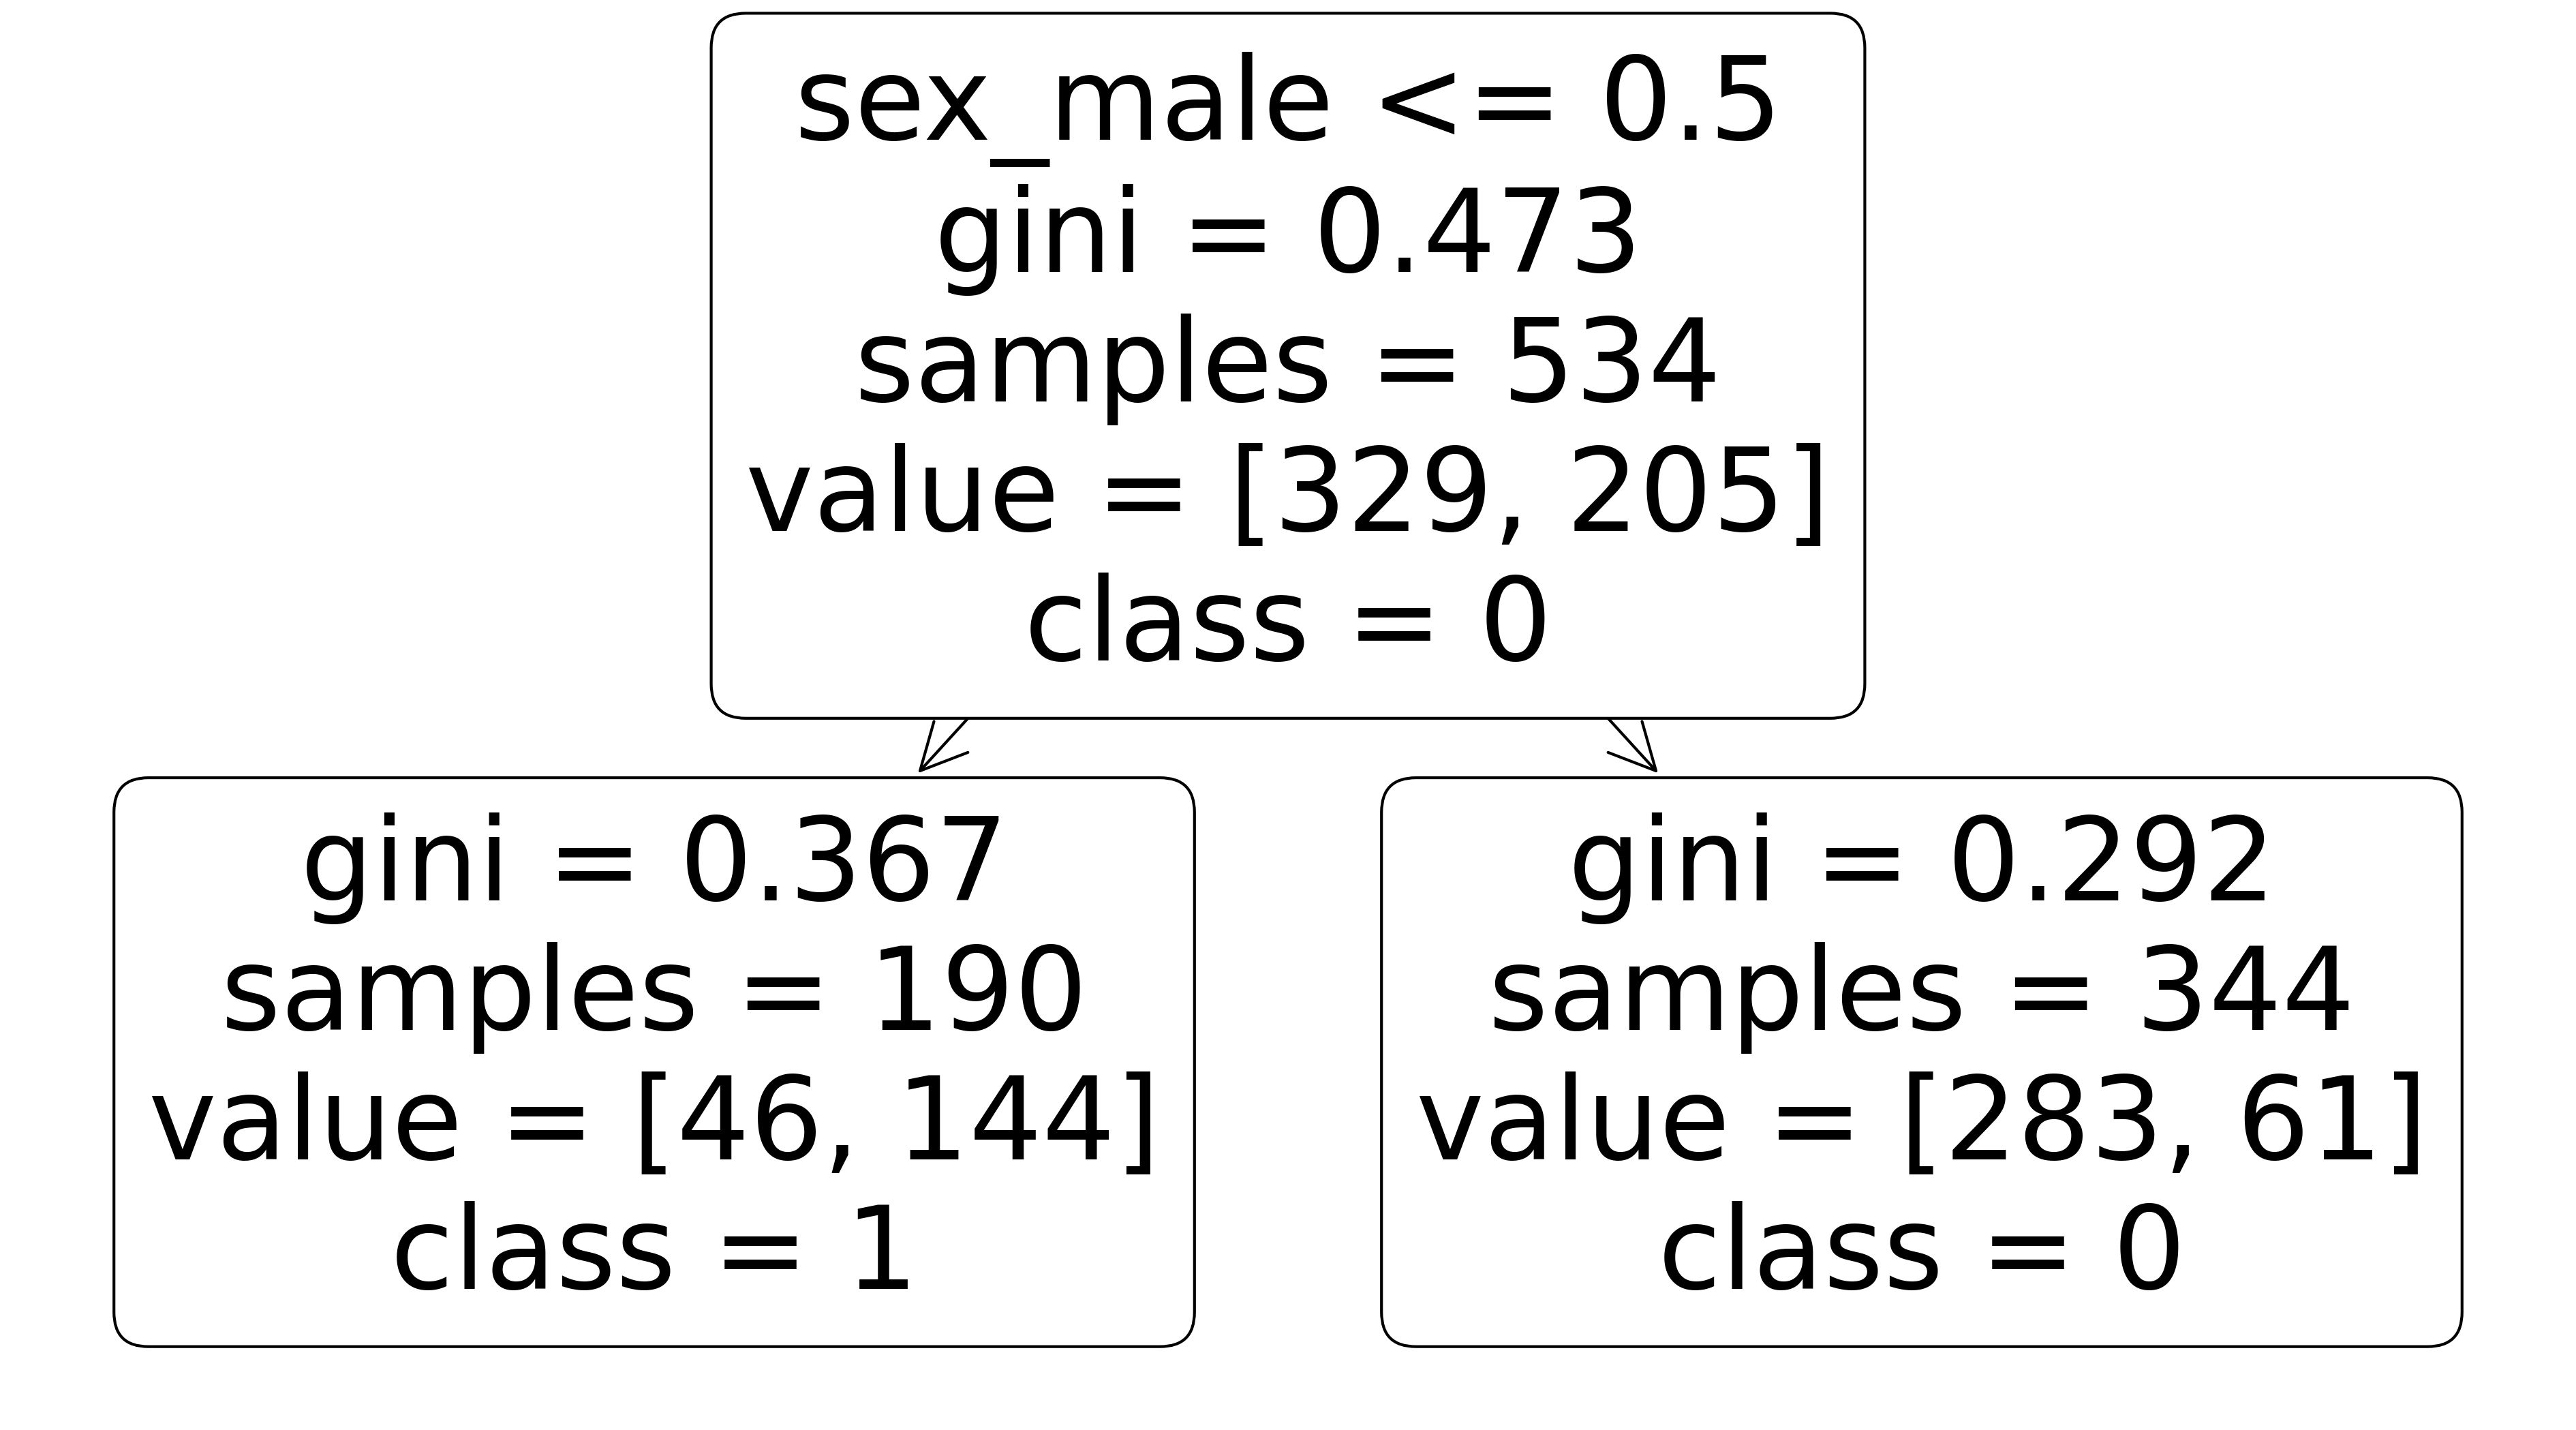

_________________________

Confusion Matrix

     0    1
0  283   46
1   61  144 

_________________________

Classification Report

                    0           1  accuracy   macro avg  weighted avg
precision    0.822674    0.757895  0.799625    0.790285      0.797806
recall       0.860182    0.702439  0.799625    0.781311      0.799625
f1-score     0.841010    0.729114  0.799625    0.785062      0.798054
support    329.000000  205.000000  0.799625  534.000000    534.000000


In [31]:
tree_trunk2=prep.decision_tree_predict(X_train, y_train,max_depth=1)

In [32]:
clf2,conf2=tree_trunk2[0],tree_trunk2[4]

In [33]:
clf2.score(X_train, y_train)

0.799625468164794

In [34]:
y_pred2 =clf2.predict(X_train)
y_pred2[:5]

array([0, 1, 1, 1, 0])

In [35]:
y_pred_prob2=clf2.predict_proba(X_train)
y_pred_prob2

array([[0.82267442, 0.17732558],
       [0.24210526, 0.75789474],
       [0.24210526, 0.75789474],
       ...,
       [0.82267442, 0.17732558],
       [0.82267442, 0.17732558],
       [0.82267442, 0.17732558]])

In [36]:
conf=confusion_matrix(y_train,y_pred2)
conf

array([[283,  46],
       [ 61, 144]])

In [37]:
pd.DataFrame(classification_report(y_train, y_pred2,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.822674,0.757895,0.799625,0.790285,0.797806
recall,0.860182,0.702439,0.799625,0.781311,0.799625
f1-score,0.841010,0.729114,0.799625,0.785062,0.798054
support,329.000000,205.000000,0.799625,534.000000,534.000000


In [38]:
tpr2 = conf[0][0] / conf[0].sum()
fpr2 = conf[1][0] / conf[1].sum()
tnr2 = conf[1][1] / conf[1].sum()
fnr2 = conf[0][1] / conf[0].sum()
tpr2,fpr2,tnr2,fnr2

(0.8601823708206687,
 0.2975609756097561,
 0.7024390243902439,
 0.1398176291793313)

## 6

Which model performs better on your in-sample data?
- Model 1

## 7

Which model performs best on your out-of-sample data, the validate set?
- Model 2's accuracy 
- ~(Model 1, slightly, aparently due to over fitting, possibly.)


model 1

In [39]:
titanic_clf.score(titanic_ml_data[2],titanic_ml_data[3])

0.7843137254901961

In [40]:
y_pred_val=titanic_clf.predict(titanic_ml_data[2])
len(y_pred_val)

204

In [41]:
y_pred_proba_val=titanic_clf.predict_proba(titanic_ml_data[2])
y_pred_proba_val[:5]

array([[0.91286307, 0.08713693],
       [0.91286307, 0.08713693],
       [0.91286307, 0.08713693],
       [0.39393939, 0.60606061],
       [0.91286307, 0.08713693]])

In [42]:
pd.DataFrame(classification_report(titanic_ml_data[3],y_pred_val,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.801471,0.750000,0.784314,0.775735,0.781791
recall,0.865079,0.653846,0.784314,0.759463,0.784314
f1-score,0.832061,0.698630,0.784314,0.765346,0.781043
support,126.000000,78.000000,0.784314,204.000000,204.000000


model 2

In [43]:
clf2.score(titanic_ml_data[2],titanic_ml_data[3])

0.7549019607843137

In [44]:
y_pred_val2=clf2.predict(titanic_ml_data[2])
y_pred_val2[:5]

array([0, 0, 0, 1, 0])

In [45]:
y_pred_proba_val2=titanic_clf.predict_proba(titanic_ml_data[2])
y_pred_proba_val2[:5]

array([[0.91286307, 0.08713693],
       [0.91286307, 0.08713693],
       [0.91286307, 0.08713693],
       [0.39393939, 0.60606061],
       [0.91286307, 0.08713693]])

In [46]:
pd.DataFrame(classification_report(titanic_ml_data[3],y_pred_val2,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.783582,0.700000,0.754902,0.741791,0.751624
recall,0.833333,0.628205,0.754902,0.730769,0.754902
f1-score,0.807692,0.662162,0.754902,0.734927,0.752048
support,126.000000,78.000000,0.754902,204.000000,204.000000


## Telco

Work through these same exercises using the Telco dataset.

In [47]:
df=prep.prep_telco()
df.drop('customer_id',axis=1,inplace=True)
df.info()

prepping telco
Using cached csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   monthly_charges                        7043 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   partner_Yes                            7043 non-null   uint8  
 6   dependents_Yes                         7043 non-null   uint8  
 7   phone_service_Yes                      7043 non-null   uint8  
 8   multiple_lines_No phone service        7043 non-null   uint8  
 9   multiple_lines_Yes                     7043 non-null   uint8  
 10  online_security_No internet service    7

In [48]:
df.total_charges.replace(to_replace=[' ',''],value=np.nan,inplace=True)

In [49]:
np.any(np.isnan(df.total_charges))

True

In [50]:
np.all(np.isfinite(df.total_charges))

False

In [51]:
df.monthly_charges.head()

0    65.6
1    59.9
2    73.9
3    98.0
4    83.9
Name: monthly_charges, dtype: float64

In [52]:
train, validate, test=prep.tralidest(df,'churn_Yes')


In [53]:
train, validate, test=prep.impute_mode(train, validate, test, ['total_charges'])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   float64
 3   total_charges                          4225 non-null   float64
 4   gender_Male                            4225 non-null   uint8  
 5   partner_Yes                            4225 non-null   uint8  
 6   dependents_Yes                         4225 non-null   uint8  
 7   phone_service_Yes                      4225 non-null   uint8  
 8   multiple_lines_No phone service        4225 non-null   uint8  
 9   multiple_lines_Yes                     4225 non-null   uint8  
 10  online_security_No internet service    4225 non-null   uint8  
 11  onli

In [55]:
ml_data=prep.ml_data(train, validate, test, 'churn_Yes')

What is your baseline prediction?

- $H_0: "\textrm{Does NOT churn (0).}"$  
- $H_1: "\textrm{Churning (1).}"$
---
- $TP: "\textrm{Happy customer.}"$  
- $TN: "\textrm{No customer.}"$
- $FN: "\textrm{Random customer walking around the store trying to get a price check.}"$
- $FP: "\textrm{👻}"$


In [56]:
X_train, y_train=ml_data[0],ml_data[1]

In [57]:
baseline=[0 for i in range(0,len(X_train))]

accuracy_score(y_train,baseline)

0.7346745562130178

In [58]:
X_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,38,95.00,3591.25,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
1,1,2,70.35,139.05,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,1,11,19.95,214.75,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1
3,0,10,86.05,834.10,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
4,0,43,60.00,2548.55,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0


_________________________

Accuracy of Decision Tree classifier on training set: 78.37%



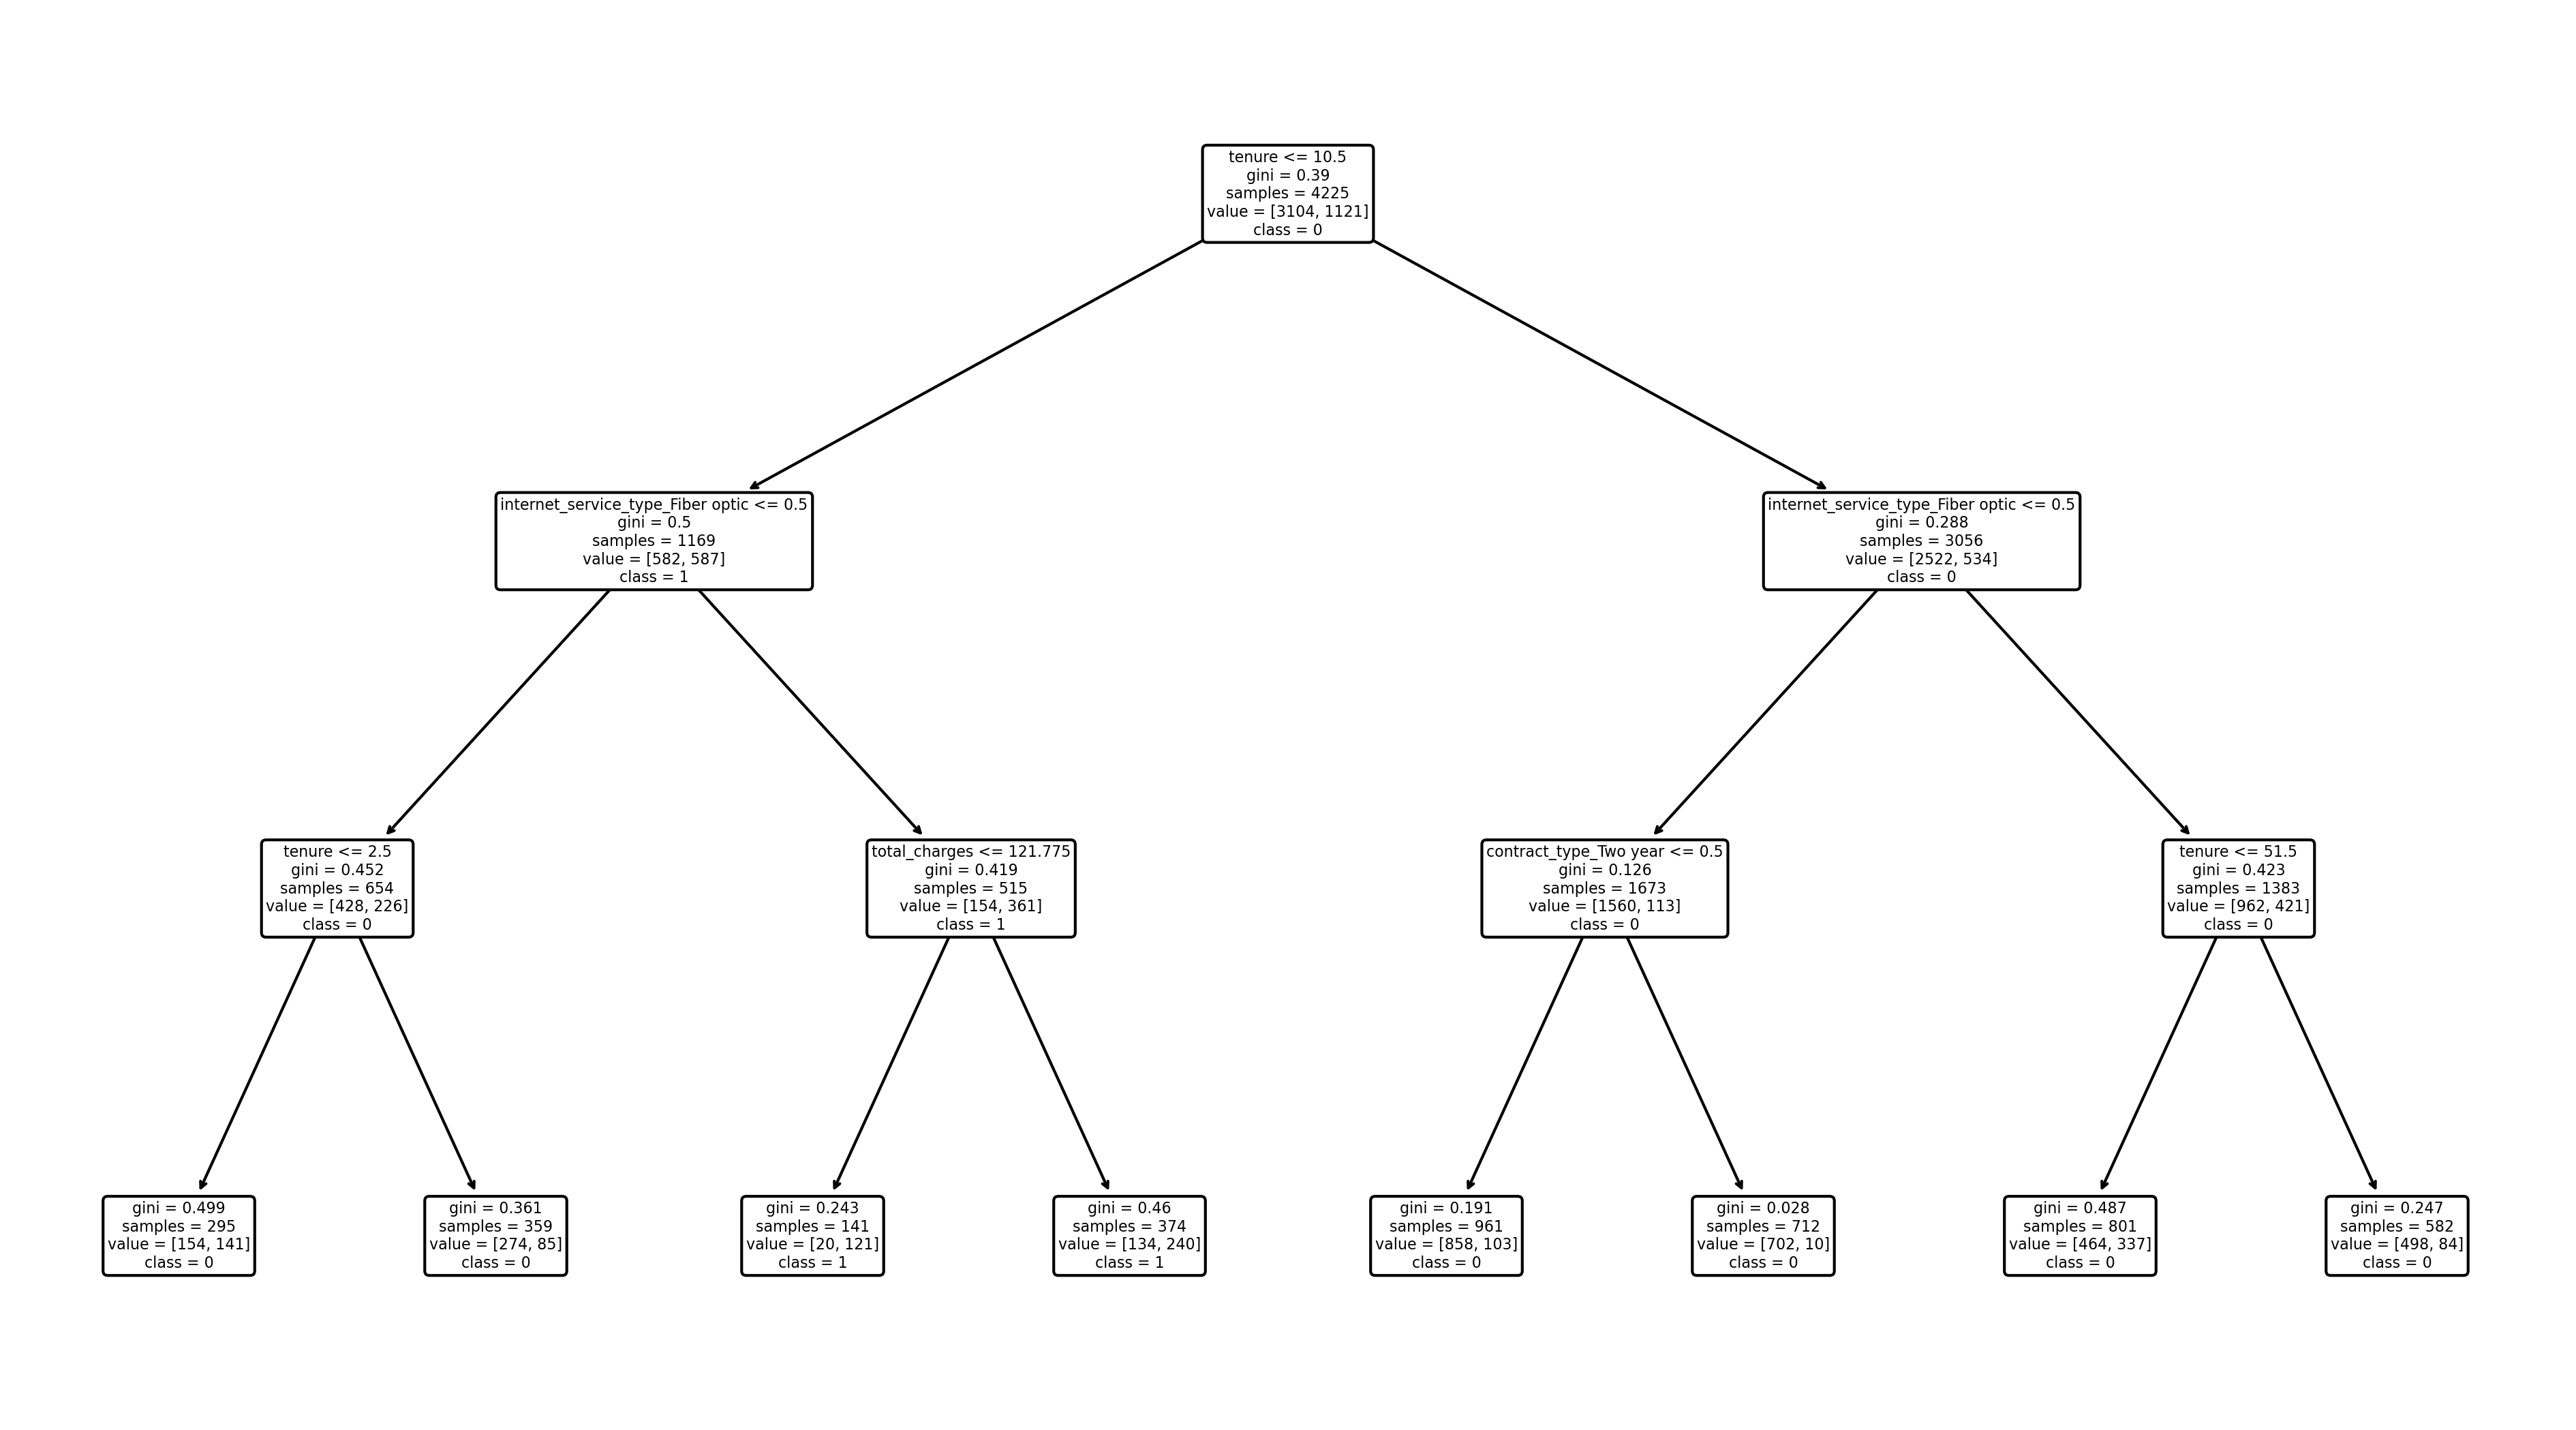

_________________________

Confusion Matrix

      0    1
0  2950  154
1   760  361 

_________________________

Classification Report

                     0            1  accuracy    macro avg  weighted avg
precision     0.795148     0.700971  0.783669     0.748060      0.770161
recall        0.950387     0.322034  0.783669     0.636210      0.783669
f1-score      0.865864     0.441320  0.783669     0.653592      0.753222
support    3104.000000  1121.000000  0.783669  4225.000000   4225.000000


In [59]:
tree_trunk_telco=prep.decision_tree_predict(X_train, y_train,max_depth=3)

In [60]:
conf=tree_trunk_telco[4]

tpr = conf[0][0] / conf[0].sum()
fpr = conf[1][0] / conf[1].sum()
tnr = conf[1][1] / conf[1].sum()
fnr = conf[0][1] / conf[0].sum()
tpr,fnr,fpr,tnr

(0.7951482479784366,
 0.20485175202156333,
 0.29902912621359223,
 0.7009708737864078)

## Classes

Experiment with this model on other datasets with a higher number of output classes.

In [61]:
df=prep.prep_iris()
df.drop('species',axis=1,inplace=True)
df.info()

prepping iris
Using cached csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   versicolor    150 non-null    uint8  
 5   virginica     150 non-null    uint8  
dtypes: float64(4), uint8(2)
memory usage: 5.1 KB


In [62]:
train, validate, test = prep.tralidest(df,['versicolor','virginica'])

In [63]:
ml_data_iris=prep.ml_data(train, validate, test,['versicolor','virginica'])

In [64]:
X_train, y_train=ml_data_iris[0],ml_data_iris[1]

In [65]:
y_train=y_train.astype(str)

In [66]:
y_train=y_train.versicolor +","+ y_train.virginica

In [67]:
y_train[:5]

0    0,0
1    1,0
2    0,1
3    1,0
4    0,0
dtype: object

_________________________

Accuracy of Decision Tree classifier on training set: 96.67%



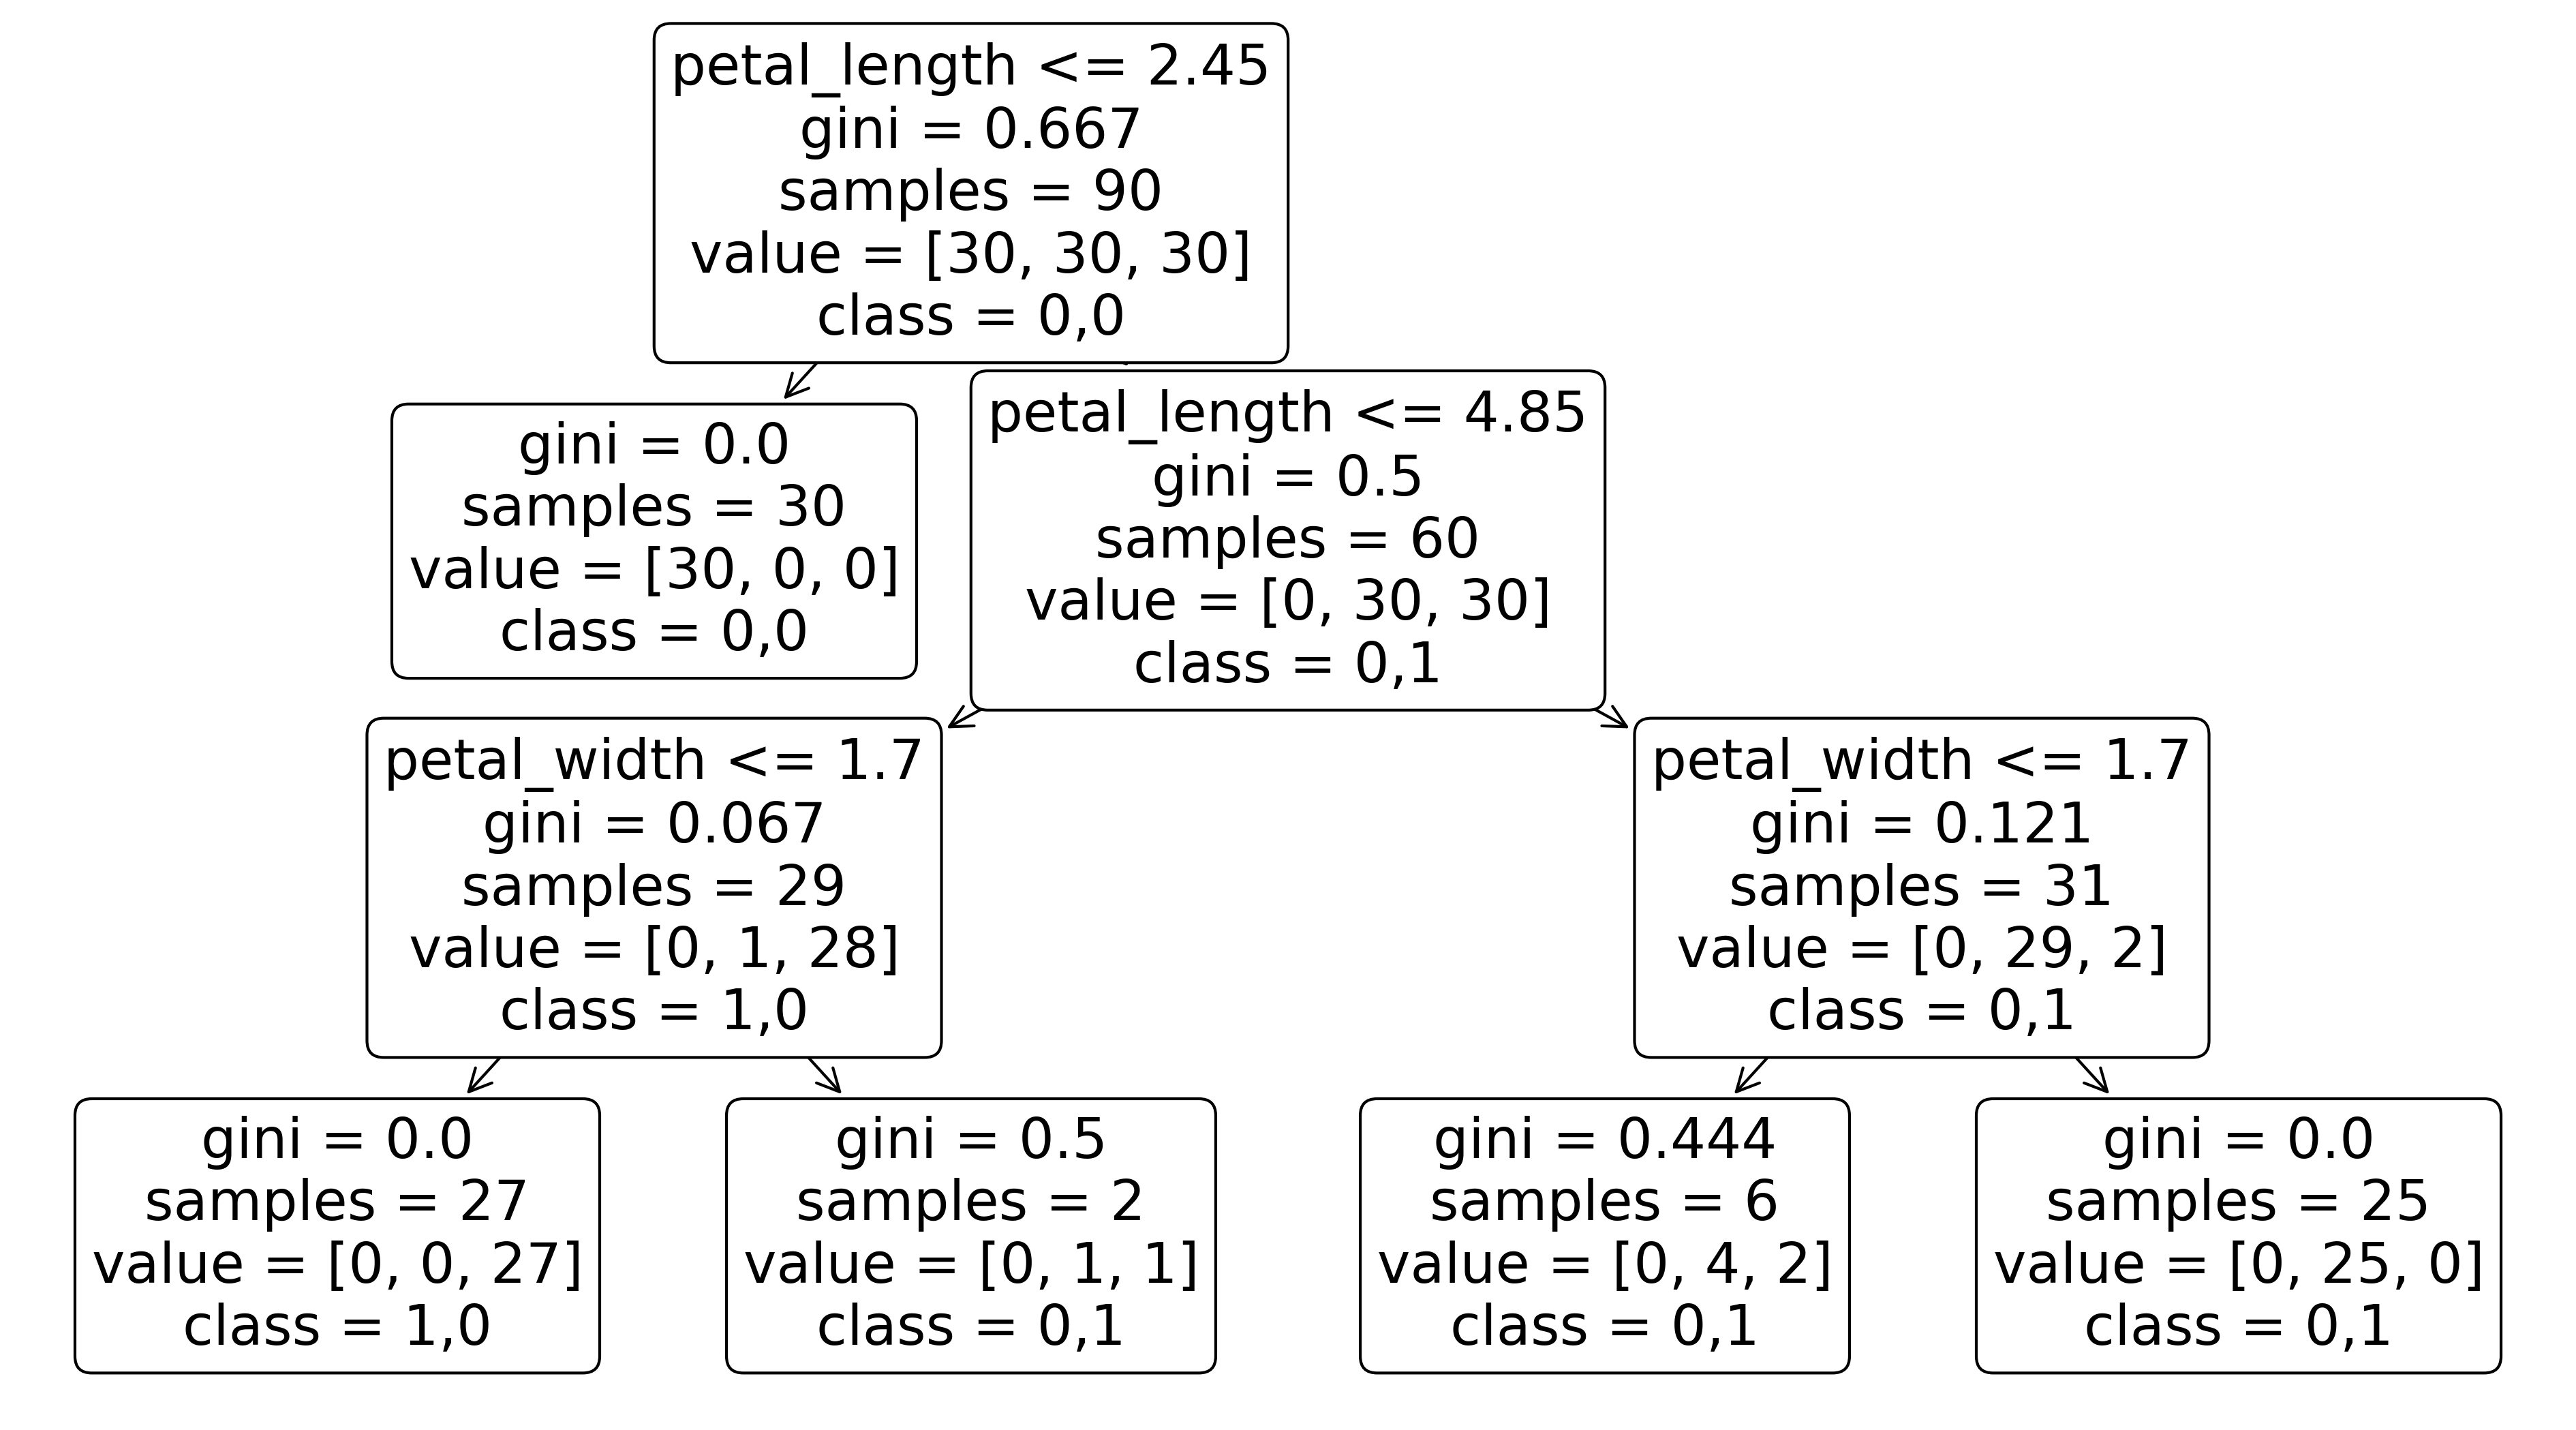

_________________________

Confusion Matrix

    0   1   2
0  30   0   0
1   0  30   0
2   0   3  27 

_________________________

Classification Report

            0,0        0,1        1,0  accuracy  macro avg  weighted avg
precision   1.0   0.909091   1.000000  0.966667   0.969697      0.969697
recall      1.0   1.000000   0.900000  0.966667   0.966667      0.966667
f1-score    1.0   0.952381   0.947368  0.966667   0.966583      0.966583
support    30.0  30.000000  30.000000  0.966667  90.000000     90.000000


In [68]:
tree_trunk_iris=prep.decision_tree_predict(X_train, y_train,max_depth=3)

# Random Forest

## Make the thing:

In [69]:
# rf = RandomForestClassifier(bootstrap=True, 
#                             class_weight=None, 
#                             criterion='gini',
#                             min_samples_leaf=3,
#                             n_estimators=100,
#                             max_depth=3, 
#                             random_state=123)

## Fit the thing:

In [70]:
# rf.fit(X_train, y_train)

## Use the thing:

In [71]:
# y_pred = rf.predict(X_train)

## Feature Importance

In [72]:
# print(rf.feature_importances_)

## Estimate Probability

In [73]:
# y_pred_proba = rf.predict_proba(X_train)

# Exercises

In [74]:
df=prep.prep_titanic()
df.info()

prepping titanic
Using cached csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   age           714 non-null    float64
 2   sibsp         891 non-null    int64  
 3   parch         891 non-null    int64  
 4   fare          891 non-null    float64
 5   sex_male      891 non-null    uint8  
 6   embarked_Q    891 non-null    uint8  
 7   embarked_S    891 non-null    uint8  
 8   class_Second  891 non-null    uint8  
 9   class_Third   891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [75]:
train, validate, test = prep.tralidest(df,['survived'])

In [76]:
train, validate, test=prep.impute_mode(train, validate, test, ['age'])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [77]:
ml_data_titanic=prep.ml_data(train, validate, test, ['survived'])

##### $H_0: $ 0 - "customer churned" 😵

## 1

In [78]:
rf = RandomForestClassifier(min_samples_leaf=1,
                            max_depth=10, 
                            random_state=123)

In [79]:
rf.fit(ml_data_titanic[0], ml_data_titanic[1])

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_7544/4248842595.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(ml_data_titanic[0], ml_data_titanic[1])


RandomForestClassifier(max_depth=10, random_state=123)

In [80]:
y_pred_titanic=rf.predict(ml_data_titanic[0])
y_pred_titanic[:5]

array([0, 1, 1, 1, 0])

In [81]:
y_pred_proba = rf.predict_proba(ml_data_titanic[0])
y_pred_proba[:5]


array([[0.85240496, 0.14759504],
       [0.06566667, 0.93433333],
       [0.        , 1.        ],
       [0.01066667, 0.98933333],
       [0.94541777, 0.05458223]])

In [82]:
print(rf.feature_importances_)

[0.21602191 0.05699105 0.03674419 0.23763344 0.31416552 0.00772322
 0.02114966 0.02038651 0.0891845 ]


## 2

In [83]:
print('Accuracy of Random Forest classifier on training set: {:.2%}\n'
      .format(rf.score(ml_data_titanic[0], ml_data_titanic[1])))

Accuracy of Random Forest classifier on training set: 96.44%



In [84]:
conf=pd.DataFrame(confusion_matrix(ml_data_titanic[1],y_pred_titanic))

In [85]:
pd.DataFrame(classification_report(ml_data_titanic[1],y_pred_titanic,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.950581,0.989474,0.964419,0.970028,0.965512
recall,0.993921,0.917073,0.964419,0.955497,0.964419
f1-score,0.971768,0.951899,0.964419,0.961833,0.964140
support,329.000000,205.000000,0.964419,534.000000,534.000000


## 3 

In [86]:
conf_strs=conf.astype(str)

In [87]:
top=pd.DataFrame([['TP: ','FN: '],['FP: ','TN:']])

In [88]:
top+conf_strs

,0,1
0,TP: 327,FN: 2
1,FP: 17,TN:188


In [89]:
tpr = conf[0][0] / conf[0].sum()
fpr = conf[1][0] / conf[1].sum()
tnr = conf[1][1] / conf[1].sum()
fnr = conf[0][1] / conf[0].sum()
tpr,fpr,tnr,fnr

(0.9505813953488372,
 0.010526315789473684,
 0.9894736842105263,
 0.04941860465116279)

In [90]:
pd.DataFrame(classification_report(ml_data_titanic[1],y_pred_titanic,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.950581,0.989474,0.964419,0.970028,0.965512
recall,0.993921,0.917073,0.964419,0.955497,0.964419
f1-score,0.971768,0.951899,0.964419,0.961833,0.964140
support,329.000000,205.000000,0.964419,534.000000,534.000000


## 4

In [91]:
rf2 = RandomForestClassifier(min_samples_leaf=3,
                            max_depth=5, 
                            random_state=123)

In [92]:
rf3 = RandomForestClassifier(min_samples_leaf=5,
                            max_depth=3, 
                            random_state=123)

In [93]:
rf2.fit(ml_data_titanic[0], ml_data_titanic[1])

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_7544/3485435995.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(ml_data_titanic[0], ml_data_titanic[1])


RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

In [94]:
rf3.fit(ml_data_titanic[0], ml_data_titanic[1])

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_7544/1443436051.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(ml_data_titanic[0], ml_data_titanic[1])


RandomForestClassifier(max_depth=3, min_samples_leaf=5, random_state=123)

In [95]:
y_pred_titanic2=rf2.predict(ml_data_titanic[0])
y_pred_titanic2[:5]

array([0, 1, 1, 1, 0])

In [96]:
y_pred_titanic3=rf3.predict(ml_data_titanic[0])
y_pred_titanic3[:5]

array([0, 1, 1, 1, 0])

In [97]:
print('Accuracy of Random Forest classifier on training set 2: {:.2%}\n'
      .format(rf2.score(ml_data_titanic[0], ml_data_titanic[1])))

Accuracy of Random Forest classifier on training set 2: 87.27%



In [98]:
print('Accuracy of Random Forest classifier on training set 2: {:.2%}\n'
      .format(rf3.score(ml_data_titanic[0], ml_data_titanic[1])))

Accuracy of Random Forest classifier on training set 2: 83.71%



In [99]:
conf2=pd.DataFrame(confusion_matrix(ml_data_titanic[1],y_pred_titanic2))

In [100]:
conf3=pd.DataFrame(confusion_matrix(ml_data_titanic[1],y_pred_titanic3))

In [101]:
pd.DataFrame(classification_report(ml_data_titanic[1],y_pred_titanic2,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.851752,0.920245,0.872659,0.885999,0.878046
recall,0.960486,0.731707,0.872659,0.846097,0.872659
f1-score,0.902857,0.815217,0.872659,0.859037,0.869213
support,329.000000,205.000000,0.872659,534.000000,534.000000


In [102]:
pd.DataFrame(classification_report(ml_data_titanic[1],y_pred_titanic3,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.804020,0.933824,0.837079,0.868922,0.853851
recall,0.972644,0.619512,0.837079,0.796078,0.837079
f1-score,0.880330,0.744868,0.837079,0.812599,0.828327
support,329.000000,205.000000,0.837079,534.000000,534.000000


In [103]:
tpr = conf2[0][0] / conf2[0].sum()
fpr = conf2[1][0] / conf2[1].sum()
tnr = conf2[1][1] / conf2[1].sum()
fnr = conf2[0][1] / conf2[0].sum()
print(f" True Positive: {tpr}, False Negative: {fnr}, False Positive: {fpr}, True Negative: {tnr}")

 True Positive: 0.8517520215633423, False Negative: 0.14824797843665768, False Positive: 0.07975460122699386, True Negative: 0.9202453987730062


In [104]:
tpr = conf3[0][0] / conf3[0].sum()
fpr = conf3[1][0] / conf3[1].sum()
tnr = conf3[1][1] / conf3[1].sum()
fnr = conf3[0][1] / conf3[0].sum()
print(f" True Positive: {tpr}, False Negative: {fnr}, False Positive: {fpr}, True Negative: {tnr}")

 True Positive: 0.8040201005025126, False Negative: 0.19597989949748743, False Positive: 0.0661764705882353, True Negative: 0.9338235294117647


## 5

What are the differences in the evaluation metrics?

- Interestingly, as the min leafs increases and the max depth increases, the model becomes better tuned at finding True Negatives, thusly affecting it's recall and precision.

Which performs better on your in-sample data? Why?
- Model 1 due to higher accuracy, precision and recall (possibly overfit?).

## 6

After making a few models, which one has the best performance (or closest metrics) on both train and validate?
- Model 2 has the highest accuracy.


In [105]:
y_pred_titanic_val=rf.predict(ml_data_titanic[2])
y_pred_titanic_val[:5]

array([0, 0, 0, 1, 0])

In [106]:
y_pred_titanic2_val=rf2.predict(ml_data_titanic[2])
y_pred_titanic2_val[:5]

array([0, 0, 0, 1, 0])

In [107]:
y_pred_titanic3_val=rf3.predict(ml_data_titanic[0])
y_pred_titanic3_val[:5]

array([0, 1, 1, 1, 0])

In [108]:
print('Accuracy of random forest classifier on val set 1: {:.2f}'.format(rf.score(ml_data_titanic[2], ml_data_titanic[3])))


Accuracy of random forest classifier on val set 1: 0.79


In [109]:
print('Accuracy of random forest classifier on val set 2: {:.2f}'.format(rf2.score(ml_data_titanic[2], ml_data_titanic[3])))


Accuracy of random forest classifier on val set 2: 0.80


In [110]:
print('Accuracy of random forest classifier on val set 3: {:.2f}'.format(rf3.score(ml_data_titanic[2], ml_data_titanic[3])))


Accuracy of random forest classifier on val set 3: 0.79


# KNN

## Make the thing:

In [111]:
# weights = ['uniform', 'density']
# knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


## Fit the thing:

In [112]:
# knn.fit(X_train, y_train)

## Use the thing:

In [113]:
# y_pred = knn.predict(X_train)

## Estimate Probability

In [114]:
# y_pred_proba = knn.predict_proba(X_train)

# Exercises

In [115]:
df=prep.prep_titanic()
df.info()

prepping titanic
Using cached csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   age           714 non-null    float64
 2   sibsp         891 non-null    int64  
 3   parch         891 non-null    int64  
 4   fare          891 non-null    float64
 5   sex_male      891 non-null    uint8  
 6   embarked_Q    891 non-null    uint8  
 7   embarked_S    891 non-null    uint8  
 8   class_Second  891 non-null    uint8  
 9   class_Third   891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [116]:
train, validate, test = prep.tralidest(df,['survived'])

In [117]:
train, validate, test=prep.impute_mode(train, validate, test, ['age'])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [118]:
ml_data_titanic=prep.ml_data(train, validate, test, ['survived'])

##### $H_0: $ 0 - "customer churned" 😵

## 1

In [119]:
knn = KNeighborsClassifier(5)

In [120]:
knn.fit(ml_data_titanic[0], ml_data_titanic[1])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [121]:
y_pred_titanic=knn.predict(ml_data_titanic[0])
y_pred_titanic[:5]

array([0, 1, 1, 1, 0])

In [122]:
y_pred_proba = knn.predict_proba(ml_data_titanic[0])
y_pred_proba[:5]


array([[0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.8, 0.2]])

## 2

In [123]:
print('Accuracy of Random Forest classifier on training set: {:.2%}\n'
      .format(knn.score(ml_data_titanic[0], ml_data_titanic[1])))

Accuracy of Random Forest classifier on training set: 79.59%



In [124]:
conf=pd.DataFrame(confusion_matrix(ml_data_titanic[1],y_pred_titanic))

In [125]:
pd.DataFrame(classification_report(ml_data_titanic[1],y_pred_titanic,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.825444,0.744898,0.79588,0.785171,0.794523
recall,0.848024,0.712195,0.79588,0.780110,0.795880
f1-score,0.836582,0.728180,0.79588,0.782381,0.794967
support,329.000000,205.000000,0.79588,534.000000,534.000000


## 3 

In [126]:
conf_strs=conf.astype(str)

In [127]:
top=pd.DataFrame([['TP: ','FN: '],['FP: ','TN:']])

In [128]:
top+conf_strs

,0,1
0,TP: 279,FN: 50
1,FP: 59,TN:146


In [129]:
tpr = conf[0][0] / conf[0].sum()
fpr = conf[1][0] / conf[1].sum()
tnr = conf[1][1] / conf[1].sum()
fnr = conf[0][1] / conf[0].sum()
tpr,fpr,tnr,fnr

(0.8254437869822485,
 0.25510204081632654,
 0.7448979591836735,
 0.17455621301775148)

In [130]:
pd.DataFrame(classification_report(ml_data_titanic[1],y_pred_titanic,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.825444,0.744898,0.79588,0.785171,0.794523
recall,0.848024,0.712195,0.79588,0.780110,0.795880
f1-score,0.836582,0.728180,0.79588,0.782381,0.794967
support,329.000000,205.000000,0.79588,534.000000,534.000000


## 4 / 5

In [131]:
knn2 = KNeighborsClassifier(10)

In [132]:
knn3 = KNeighborsClassifier(20)

In [133]:
knn2.fit(ml_data_titanic[0], ml_data_titanic[1])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [134]:
knn3.fit(ml_data_titanic[0], ml_data_titanic[1])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [135]:
y_pred_titanic2=knn2.predict(ml_data_titanic[0])
y_pred_titanic2[:5]

array([0, 1, 1, 1, 0])

In [136]:
y_pred_titanic3=knn3.predict(ml_data_titanic[0])
y_pred_titanic3[:5]

array([0, 1, 1, 1, 0])

In [137]:
print('Accuracy of Random Forest classifier on training set 2: {:.2%}\n'
      .format(knn2.score(ml_data_titanic[0], ml_data_titanic[1])))

Accuracy of Random Forest classifier on training set 2: 75.66%



In [138]:
print('Accuracy of Random Forest classifier on training set 2: {:.2%}\n'
      .format(knn3.score(ml_data_titanic[0], ml_data_titanic[1])))

Accuracy of Random Forest classifier on training set 2: 73.60%



In [139]:
conf2=pd.DataFrame(confusion_matrix(ml_data_titanic[1],y_pred_titanic2))

In [140]:
conf3=pd.DataFrame(confusion_matrix(ml_data_titanic[1],y_pred_titanic3))

In [141]:
pd.DataFrame(classification_report(ml_data_titanic[1],y_pred_titanic2,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.757106,0.755102,0.756554,0.756104,0.756337
recall,0.890578,0.541463,0.756554,0.716020,0.756554
f1-score,0.818436,0.630682,0.756554,0.724559,0.746358
support,329.000000,205.000000,0.756554,534.000000,534.000000


In [142]:
pd.DataFrame(classification_report(ml_data_titanic[1],y_pred_titanic3,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.742268,0.719178,0.735955,0.730723,0.733404
recall,0.875380,0.512195,0.735955,0.693788,0.735955
f1-score,0.803347,0.598291,0.735955,0.700819,0.724627
support,329.000000,205.000000,0.735955,534.000000,534.000000


In [143]:
tpr = conf2[0][0] / conf2[0].sum()
fpr = conf2[1][0] / conf2[1].sum()
tnr = conf2[1][1] / conf2[1].sum()
fnr = conf2[0][1] / conf2[0].sum()
print(f" True Positive: {tpr}, False Negative: {fnr}, False Positive: {fpr}, True Negative: {tnr}")

 True Positive: 0.7571059431524548, False Negative: 0.24289405684754523, False Positive: 0.24489795918367346, True Negative: 0.7551020408163265


In [144]:
tpr = conf3[0][0] / conf3[0].sum()
fpr = conf3[1][0] / conf3[1].sum()
tnr = conf3[1][1] / conf3[1].sum()
fnr = conf3[0][1] / conf3[0].sum()
print(f" True Positive: {tpr}, False Negative: {fnr}, False Positive: {fpr}, True Negative: {tnr}")

 True Positive: 0.7422680412371134, False Negative: 0.25773195876288657, False Positive: 0.2808219178082192, True Negative: 0.7191780821917808


## 6

What are the differences in the evaluation metrics?

- The lower k value produce better f1-score and accuracy

Which performs better on your in-sample data? Why?
- Model 1 due to higher accuracy, precision and recall (possibly overfit?).

## 7

After making a few models, which one has the best performance (or closest metrics) on both train and validate?
- Model 2 and 3 perform better on the validate set.


In [145]:
y_pred_titanic_val=knn.predict(ml_data_titanic[2])
y_pred_titanic_val[:5]

array([0, 0, 0, 1, 0])

In [146]:
y_pred_titanic2_val=knn2.predict(ml_data_titanic[2])
y_pred_titanic2_val[:5]

array([0, 0, 0, 1, 0])

In [147]:
y_pred_titanic3_val=knn3.predict(ml_data_titanic[0])
y_pred_titanic3_val[:5]

array([0, 1, 1, 1, 0])

In [148]:
print('Accuracy of random forest classifier on val set 1: {:.2f}'.format(knn.score(ml_data_titanic[2], ml_data_titanic[3])))


Accuracy of random forest classifier on val set 1: 0.66


In [149]:
print('Accuracy of random forest classifier on val set 2: {:.2f}'.format(knn2.score(ml_data_titanic[2], ml_data_titanic[3])))


Accuracy of random forest classifier on val set 2: 0.68


In [150]:
print('Accuracy of random forest classifier on val set 3: {:.2f}'.format(knn3.score(ml_data_titanic[2], ml_data_titanic[3])))


Accuracy of random forest classifier on val set 3: 0.68


# Logistic Regression

## Make the thing:

In [151]:
# logit = LogisticRegression(class_weight={0:1, 1:99}, random_state=123, solver='lbfgs')

## Fit the thing:

In [152]:
# logit.fit(X_train, y_train)

## Use the thing:

In [153]:
# y_pred = logit.predict(X_train)

## Feature Importance

In [154]:
# print('Coefficient: \n', logit.coef_)
# print('Intercept: \n', logit.intercept_)


## C

In [155]:
# logit2 = LogisticRegression(C=.1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [156]:
# logit2.fit(X_train, y_train)

In [157]:
# y_pred2 = logit2.predict(X_train)

# Exercises

In [158]:
df=prep.prep_titanic()
df.info()

prepping titanic
Using cached csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   age           714 non-null    float64
 2   sibsp         891 non-null    int64  
 3   parch         891 non-null    int64  
 4   fare          891 non-null    float64
 5   sex_male      891 non-null    uint8  
 6   embarked_Q    891 non-null    uint8  
 7   embarked_S    891 non-null    uint8  
 8   class_Second  891 non-null    uint8  
 9   class_Third   891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [159]:
train, validate, test = prep.tralidest(df,['survived'])

In [160]:
train, validate, test=prep.impute_mode(train, validate, test, ['age'])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [161]:
ml_data_titanic=prep.ml_data(train, validate, test, ['survived'])

##### $H_0: $ 0 - "customer churned" 😵

## 1

In [162]:
ml_data_titanic[0].columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S',
       'class_Second', 'class_Third'],
      dtype='object')

In [163]:
firstsy=ml_data_titanic[0].drop(columns=['sibsp', 'parch', 'sex_male', 'embarked_Q', 'embarked_S'])
baseline=[0 for i in range(0,len(firstsy))]
firstsy.head()

,age,fare,class_Second,class_Third
0,19.0,7.7500,0,1
1,62.0,80.0000,0,0
2,31.0,113.2750,0,0
3,35.0,512.3292,0,0
4,45.0,6.9750,0,1


In [164]:
logit = LogisticRegression(random_state=123, solver='lbfgs')

In [165]:
logit.fit(firstsy, ml_data_titanic[1])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=123)

In [166]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.03112836  0.00375588 -0.32444622 -1.75517713]]
Intercept: 
 [1.24541431]


In [167]:
y_pred = logit.predict(firstsy)

In [168]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(firstsy,ml_data_titanic[1] )))

Accuracy of Logistic Regression classifier on training set: 0.69


In [169]:
print(confusion_matrix(ml_data_titanic[1], y_pred))


[[268  61]
 [107  98]]


In [170]:
print(confusion_matrix(ml_data_titanic[1], baseline))


[[329   0]
 [205   0]]


Does this model perform better than your baseline?
- yes, accuracy is slightly higher


In [171]:
print(classification_report(ml_data_titanic[1], y_pred))


              precision    recall  f1-score   support

           0       0.71      0.81      0.76       329
           1       0.62      0.48      0.54       205

    accuracy                           0.69       534
   macro avg       0.67      0.65      0.65       534
weighted avg       0.68      0.69      0.68       534



In [172]:
print(classification_report(ml_data_titanic[1], baseline))


              precision    recall  f1-score   support

           0       0.62      1.00      0.76       329
           1       0.00      0.00      0.00       205

    accuracy                           0.62       534
   macro avg       0.31      0.50      0.38       534
weighted avg       0.38      0.62      0.47       534



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2

In [173]:
ml_data_titanic[0].columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S',
       'class_Second', 'class_Third'],
      dtype='object')

In [174]:
firstsy=ml_data_titanic[0].drop(columns=['sibsp', 'parch', 'embarked_Q', 'embarked_S'])
baseline=[0 for i in range(0,len(firstsy))]
firstsy.head()

,age,fare,sex_male,class_Second,class_Third
0,19.0,7.7500,1,0,1
1,62.0,80.0000,0,0,0
2,31.0,113.2750,0,0,0
3,35.0,512.3292,0,0,0
4,45.0,6.9750,1,0,1


In [175]:
logit = LogisticRegression(random_state=123, solver='lbfgs')

In [176]:
logit.fit(firstsy, ml_data_titanic[1])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=123)

In [177]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-3.37284665e-02  2.28712802e-03 -2.62817833e+00 -5.15610482e-01
  -2.00442300e+00]]
Intercept: 
 [3.11694594]


In [178]:
y_pred = logit.predict(firstsy)

In [179]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(firstsy,ml_data_titanic[1] )))

Accuracy of Logistic Regression classifier on training set: 0.81


In [180]:
print(confusion_matrix(ml_data_titanic[1], y_pred))


[[285  44]
 [ 59 146]]


In [181]:
print(confusion_matrix(ml_data_titanic[1], baseline))


[[329   0]
 [205   0]]


Does this model perform better than your baseline?
- yes, accuracy is slightly higher


In [182]:
print(classification_report(ml_data_titanic[1], y_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       329
           1       0.77      0.71      0.74       205

    accuracy                           0.81       534
   macro avg       0.80      0.79      0.79       534
weighted avg       0.81      0.81      0.81       534



In [183]:
print(classification_report(ml_data_titanic[1], baseline))


              precision    recall  f1-score   support

           0       0.62      1.00      0.76       329
           1       0.00      0.00      0.00       205

    accuracy                           0.62       534
   macro avg       0.31      0.50      0.38       534
weighted avg       0.38      0.62      0.47       534



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3

In [184]:
ml_data_titanic[0].columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S',
       'class_Second', 'class_Third'],
      dtype='object')

In [185]:
firstsy=ml_data_titanic[0].drop(columns=['sibsp', 'parch', 'embarked_Q', 'embarked_S'])
firstsy.head()

,age,fare,sex_male,class_Second,class_Third
0,19.0,7.7500,1,0,1
1,62.0,80.0000,0,0,0
2,31.0,113.2750,0,0,0
3,35.0,512.3292,0,0,0
4,45.0,6.9750,1,0,1


In [186]:
logit1 = LogisticRegression(C=10, random_state=123, solver='lbfgs')
logit2 = LogisticRegression(C=.1, random_state=123, solver='lbfgs')
logit3 = LogisticRegression(class_weight={0: 1, 1: 99}, random_state=123, solver='lbfgs')
logit4 = LogisticRegression(class_weight={0: 1, 1: 99}, random_state=123, solver='lbfgs')

In [187]:
logit1.fit(firstsy, ml_data_titanic[1])
logit2.fit(firstsy, ml_data_titanic[1])
logit3.fit(firstsy, ml_data_titanic[1])
logit4.fit(firstsy, ml_data_titanic[1])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

LogisticRegression(class_weight={0: 1, 1: 99}, random_state=123)

In [188]:
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)
print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)
print('Coefficient: \n', logit4.coef_)
print('Intercept: \n', logit4.intercept_)

Coefficient: 
 [[-3.75892379e-02  1.34248888e-03 -2.81434145e+00 -7.68210927e-01
  -2.34380303e+00]]
Intercept: 
 [3.59361472]
Coefficient: 
 [[-0.02226442  0.00556213 -1.79650175  0.0748788  -0.99983441]]
Intercept: 
 [1.55685141]
Coefficient: 
 [[-0.03729424  0.00395876 -2.60037991 -0.77906305 -1.7819945 ]]
Intercept: 
 [7.6486175]
Coefficient: 
 [[-0.03729424  0.00395876 -2.60037991 -0.77906305 -1.7819945 ]]
Intercept: 
 [7.6486175]


In [189]:
y_pred1 = logit1.predict(firstsy)
y_pred2 = logit2.predict(firstsy)
y_pred3 = logit3.predict(firstsy)
y_pred4 = logit4.predict(firstsy)

In [190]:
print('Accuracy of Logistic Regression classifier on training 1: {:.2f}'.format(logit1.score(firstsy,ml_data_titanic[1] )))
print('Accuracy of Logistic Regression classifier on training 2: {:.2f}'.format(logit2.score(firstsy,ml_data_titanic[1] )))
print('Accuracy of Logistic Regression classifier on training 3: {:.2f}'.format(logit3.score(firstsy,ml_data_titanic[1] )))
print('Accuracy of Logistic Regression classifier on training 4: {:.2f}'.format(logit4.score(firstsy,ml_data_titanic[1] )))

Accuracy of Logistic Regression classifier on training 1: 0.80
Accuracy of Logistic Regression classifier on training 2: 0.81
Accuracy of Logistic Regression classifier on training 3: 0.38
Accuracy of Logistic Regression classifier on training 4: 0.38


In [191]:
print(confusion_matrix(ml_data_titanic[1], y_pred1))
print(confusion_matrix(ml_data_titanic[1], y_pred2))
print(confusion_matrix(ml_data_titanic[1], y_pred3))
print(confusion_matrix(ml_data_titanic[1], y_pred4))


[[277  52]
 [ 55 150]]
[[292  37]
 [ 63 142]]
[[  0 329]
 [  0 205]]
[[  0 329]
 [  0 205]]


In [192]:
print(classification_report(ml_data_titanic[1], y_pred1))
print(classification_report(ml_data_titanic[1], y_pred2))
print(classification_report(ml_data_titanic[1], y_pred3))
print(classification_report(ml_data_titanic[1], y_pred4))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       329
           1       0.74      0.73      0.74       205

    accuracy                           0.80       534
   macro avg       0.79      0.79      0.79       534
weighted avg       0.80      0.80      0.80       534

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       329
           1       0.79      0.69      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.38      1.00      0.55       205

    accuracy                           0.38       534
   macro avg       0.19      0.50      0.28       534
weighted avg       0.15      0.38      0.21       534

              preci

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/si

## 4

In [193]:
ml_data_titanic[2]

,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,33.0,0,0,7.7750,1,0,1,0,1
1,19.0,0,0,15.1000,1,0,1,0,1
2,31.0,0,0,7.9250,1,0,1,0,1
3,1.0,0,2,15.7417,0,0,0,0,1
4,22.0,0,0,9.0000,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
199,41.0,0,0,134.5000,0,0,0,0,0
200,22.0,0,0,7.7750,0,0,1,0,1
201,17.0,0,0,14.4583,0,0,0,0,1
202,19.0,0,0,7.8958,1,0,1,0,1


In [194]:
secondsy=ml_data_titanic[2].drop(columns=['sibsp', 'parch', 'embarked_Q', 'embarked_S'])
baseline=[0 for i in range(0,len(secondsy))]
secondsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           204 non-null    float64
 1   fare          204 non-null    float64
 2   sex_male      204 non-null    uint8  
 3   class_Second  204 non-null    uint8  
 4   class_Third   204 non-null    uint8  
dtypes: float64(2), uint8(3)
memory usage: 3.9 KB


In [195]:
pred_val= logit.predict(secondsy)
pred_val1= logit1.predict(secondsy)
pred_val2= logit2.predict(secondsy)

In [196]:
print('Accuracy: {:.2f}'.format(logit.score(secondsy,ml_data_titanic[3] )))
print('Accuracy1: {:.2f}'.format(logit2.score(secondsy,ml_data_titanic[3] )))
print('Accuracy2: {:.2f}'.format(logit3.score(secondsy,ml_data_titanic[3] )))

Accuracy: 0.77
Accuracy1: 0.76
Accuracy2: 0.38


In [197]:
print('logit\n',confusion_matrix(ml_data_titanic[3], pred_val))
print('logit1\n',confusion_matrix(ml_data_titanic[3], pred_val1))
print('logit2\n',confusion_matrix(ml_data_titanic[3], pred_val2))


logit
 [[106  20]
 [ 26  52]]
logit1
 [[103  23]
 [ 25  53]]
logit2
 [[107  19]
 [ 29  49]]


In [198]:
print('logit\n',classification_report(ml_data_titanic[3], pred_val))
print('logit1\n',classification_report(ml_data_titanic[3], pred_val1))
print('logit2\n',classification_report(ml_data_titanic[3], pred_val2))

logit
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       126
           1       0.72      0.67      0.69        78

    accuracy                           0.77       204
   macro avg       0.76      0.75      0.76       204
weighted avg       0.77      0.77      0.77       204

logit1
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       126
           1       0.70      0.68      0.69        78

    accuracy                           0.76       204
   macro avg       0.75      0.75      0.75       204
weighted avg       0.76      0.76      0.76       204

logit2
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       126
           1       0.72      0.63      0.67        78

    accuracy                           0.76       204
   macro avg       0.75      0.74      0.74       204
weighted avg       0.76      0.76      0.76       2

# 5

In [199]:
ter=ml_data_titanic[4].drop(columns=['sibsp', 'parch', 'embarked_Q', 'embarked_S'])
ter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           153 non-null    float64
 1   fare          153 non-null    float64
 2   sex_male      153 non-null    uint8  
 3   class_Second  153 non-null    uint8  
 4   class_Third   153 non-null    uint8  
dtypes: float64(2), uint8(3)
memory usage: 3.0 KB


In [200]:
predict_test=logit.predict(ter)

In [201]:
print('Accuracy: {:.2f}'.format(logit.score(ter,ml_data_titanic[5] )))

Accuracy: 0.80


In [202]:
print('logit\n',confusion_matrix(ml_data_titanic[5], predict_test))

logit
 [[82 12]
 [19 40]]


In [203]:
print('logit\n',classification_report(ml_data_titanic[5], predict_test))

logit
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.77      0.68      0.72        59

    accuracy                           0.80       153
   macro avg       0.79      0.78      0.78       153
weighted avg       0.80      0.80      0.79       153



How do the performance metrics compare to validate?
- Not to much of a drop in performance, i'm pleasently surprised.

How do the performance metrics compare to train?
- Model stayed on par with the train set.
